# Part I - (Ford GoBike System Data)
## by Batool Hammouda

## Introduction

> Over the duration of a month, approximately 183,000 individual ride records were gathered for the Ford GoBike System dataset, which provides detailed information on bike-sharing trips made in the San Francisco Bay Area.  Every entry contains information about the trip's duration, start and end timestamps, station names and IDs, user type (customer or subscriber), gender, and year of birth.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### Structure of the dataset:

> Each row indicates a unique bike trip made through the Ford GoBike system.  The duration of the trip, start and end times, station details, user type, and information about the user like gender and birth year are all described in all of the columns that make up each row.

### The main feature(s) of interest in the dataset:

> The dataset's main features of interest are trip duration, user type, start and end time, and rider information, including gender and age.

### Features in the dataset i  think will help support the investigation into  feature(s) of interest:

> duration_sec: Shows the exact duration of each trip, which is essential when exploring patterns of ride length.

  user_type: Allows to compare usage patterns across user groups by distinguishing between Subscribers and Customers.

  start_time and end_time: These let us extract other time-based information, such as the day of the week, the hour of the day, and whether the trip took place on a weekday or a weekend.

  Member_birth_year and gender:  These factors helps in understanding the ways in which gender and age impact usage patterns. 
  
  Start_station_name and end_station_name are useful for identifying well-traveled routes or stations that may affect user preferences or trip duration.
  

### Questions to answer:
 how do trip durations vary between Subscribers and Customers across different times of the day?
 how do rider characteristics such as age and gender influence usage patterns and trip durations in the Ford GoBike system?

## Univariate Exploration

In [4]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


As we can see, the format for the start and end times needs to be clearer. Additionally, we need to determine the user's age based on the year of birth because we need that information for our analysis, but first we must check the null in essential features.

In [5]:
df.shape

(183412, 16)

In [6]:
features=['duration_sec','start_time', 'end_time', 'member_birth_year','user_type','member_gender']
null_summary = df[features].isnull().sum()
print(null_summary)

duration_sec            0
start_time              0
end_time                0
member_birth_year    8265
user_type               0
member_gender        8265
dtype: int64


Since only 4.5% of the member_birth_year and member_gender are missing, we can remove the rows that contain those missing values.

In [7]:
#remove rows with missing value
df = df.dropna(subset=['member_birth_year', 'member_gender'])
null_summary = df[features].isnull().sum()
print(null_summary)

duration_sec         0
start_time           0
end_time             0
member_birth_year    0
user_type            0
member_gender        0
dtype: int64


In [8]:
#create age feature based on the year of 
df['age'] = 2019 - df['member_birth_year']
df.head(5)

/tmp/ipykernel_13/2094080093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2019 - df['member_birth_year']


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0


Since starting year is 2019 i found the age for each user in in 2019.

In [9]:
#Convert to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#Create new columns for date and time
df['start_date'] = df['start_time'].dt.date.astype(str)
df['start_time'] = df['start_time'].dt.time.astype(str)

df['end_date'] = df['end_time'].dt.date.astype(str)
df['end_time'] = df['end_time'].dt.time.astype(str)
df.head(5)


/tmp/ipykernel_13/3827509325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_time'] = pd.to_datetime(df['start_time'])
/tmp/ipykernel_13/3827509325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_time'] = pd.to_datetime(df['end_time'])
/tmp/ipykernel_13/3827509325.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,2019-02-28,2019-03-01
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,2019-02-28,2019-03-01
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,2019-02-28,2019-03-01
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,2019-02-28,2019-03-01
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,2019-02-28,2019-03-01


In [10]:
def labels(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

/tmp/ipykernel_13/1469765433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')


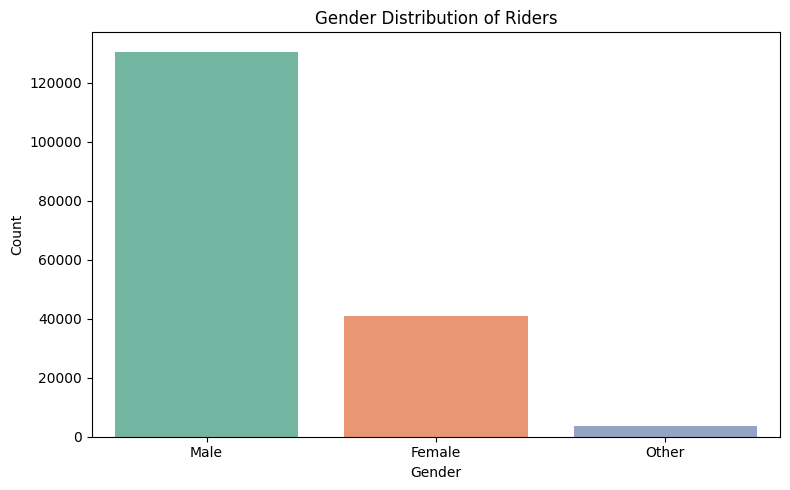

In [11]:
gender_counts = df['member_gender'].value_counts()

# Plot as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')

# Add titles and labels
labels('Gender Distribution of Riders','Gender','Count')
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/2343461999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='user_type', palette='Set2')


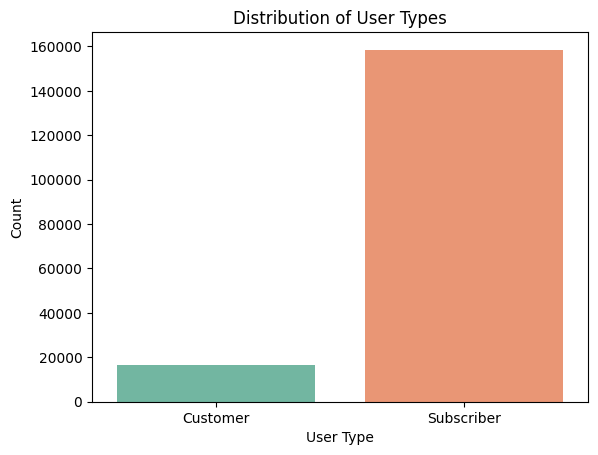

In [12]:
#Are most riders Subscribers or Customers?
sns.countplot(data=df, x='user_type', palette='Set2')
labels('Distribution of User Types','User Type','Count' )
plt.show()

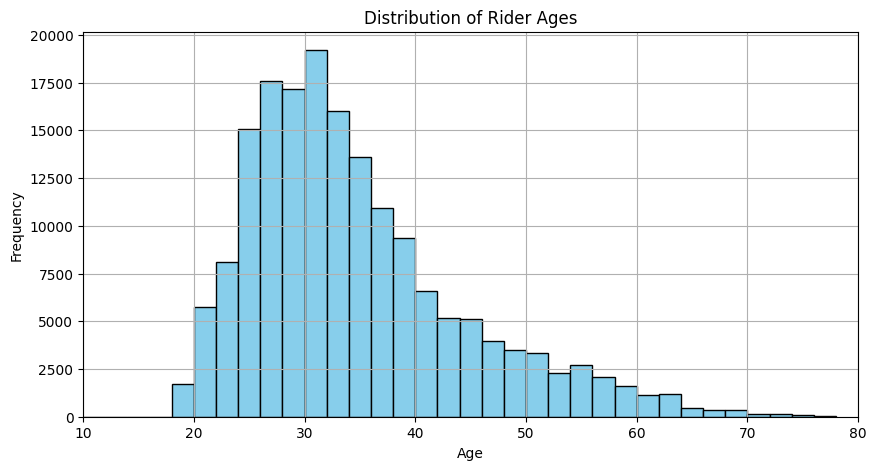

In [13]:
#What is the age distribution of riders?
plt.figure(figsize=(10,5))
bins = np.arange(10, 80, 2)
plt.hist(df['age'], bins=bins, edgecolor='k', color='skyblue')
labels('Distribution of Rider Ages','Age','Frequency')
plt.xlim(10, 80)
plt.grid(True)
plt.show()

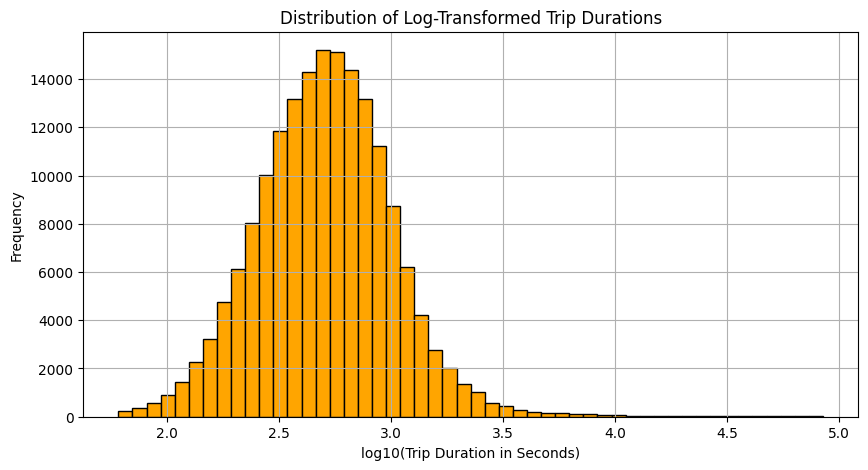

In [14]:
df_filtered = df[df['duration_sec'] > 0]

#Plot histogram of log-transformed duration
plt.figure(figsize=(10, 5))
log_durations = np.log10(df_filtered['duration_sec'])
plt.hist(log_durations, bins=50, edgecolor='k', color='orange')
labels('Distribution of Log-Transformed Trip Durations','log10(Trip Duration in Seconds)','Frequency')
plt.grid(True)
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The majority of users are young adults, as shown by the right-skewed age distribution, which shows that most riders are between the ages of 25 and 40. While there are a small number of riders over 60, they are very rare.  The distribution of user types is noticeably unbalanced, with Subscribers accounting for a large number of users as compared to Customers. This is consistent with the idea that frequent riders are more likely to remain with subscriptions.  We used a log base-10 transformation to normalize the trip duration variable (duration_sec), which was initially highly right-skewed because of a few very long trips. This transformation produced a more shaped like bells distribution, which was simpler to understand and evaluate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age variable did not show any highly unusual distributions among the features investigated; however, to guarantee data quality, possible outliers, such as ages below 10 or above 80, should be reviewed in the complete dataset.  Although the user_type variable didn't need to be changed or cleaned up, it is important to note its obvious imbalance Subscribers far exceed Customers for comparison in a future steps.  However, we removed zero or negative durations and used a log base-10 transformation to normalize the distribution and highlight underlying patterns in order to address the duration_sec feature's strong right skew with extreme outliers.

## Bivariate Exploration

/tmp/ipykernel_13/1831975771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_duration'] = np.log10(df['duration_sec'])


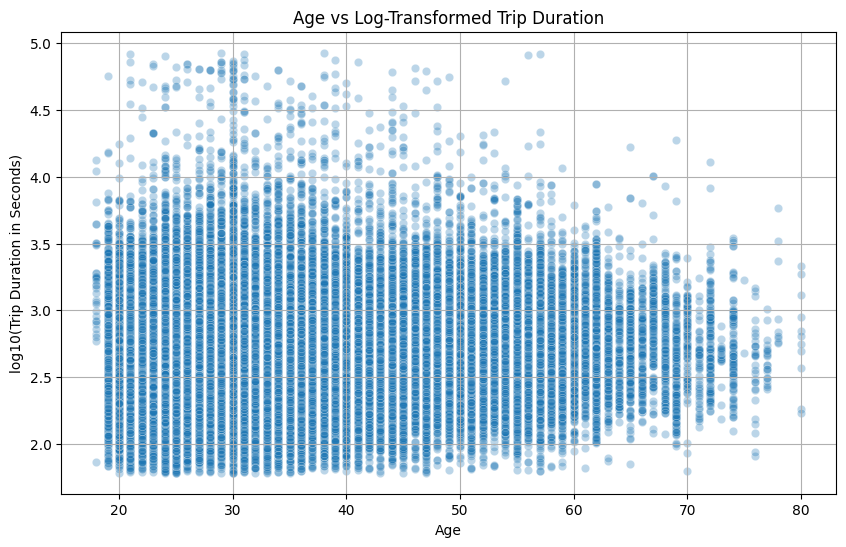

In [15]:
#Age vs Log Duration
df['log_duration'] = np.log10(df['duration_sec'])

#Remove invalid ages and durations
df_scatter = df[(df['age'] >= 18) & (df['age'] <= 80) & (df['duration_sec'] > 0)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_scatter, x='age', y='log_duration', alpha=0.3)
labels('Age vs Log-Transformed Trip Duration','Age','log10(Trip Duration in Seconds)')
plt.grid(True)
plt.show()

/tmp/ipykernel_13/1065310652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scatter, x='user_type', y='log_duration', palette='Set2')


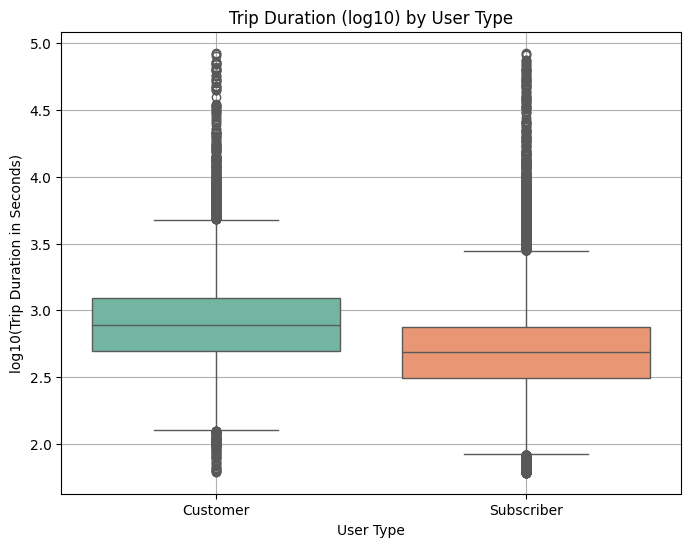

In [14]:
#User Type vs Log Duration
plt.figure(figsize=(8,6))
sns.boxplot(data=df_scatter, x='user_type', y='log_duration', palette='Set2')
labels('Trip Duration (log10) by User Type','User Type','log10(Trip Duration in Seconds)')
plt.grid(True)
plt.show()

/tmp/ipykernel_13/3852918906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scatter['age_group'] = pd.cut(df_scatter['age'], bins=[18, 25, 35, 45, 55, 65, 80],
/tmp/ipykernel_13/3852918906.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_user_group = df_scatter.groupby(['age_group', 'user_type']).size().reset_index(name='count')


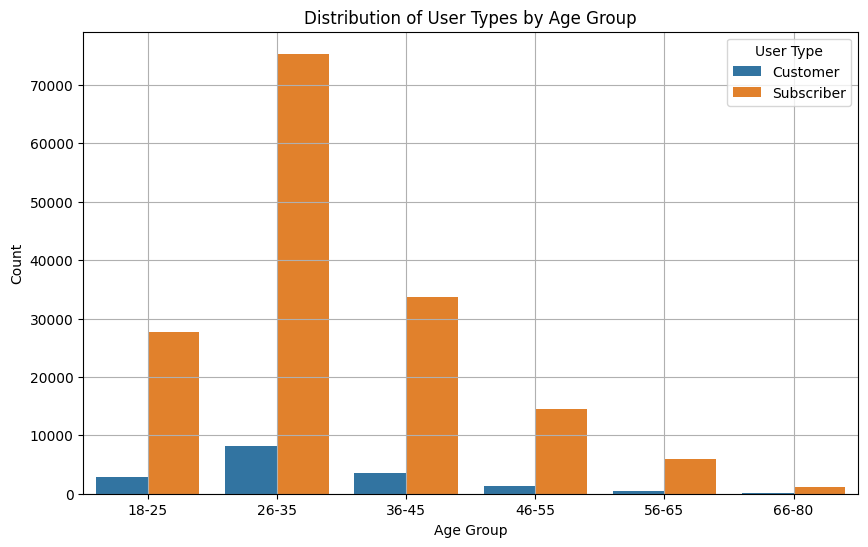

In [16]:
#Create age groups
df_scatter['age_group'] = pd.cut(df_scatter['age'], bins=[18, 25, 35, 45, 55, 65, 80], 
                                 labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-80'])

#Group by user type and age group
age_user_group = df_scatter.groupby(['age_group', 'user_type']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=age_user_group, x='age_group', y='count', hue='user_type')
labels('Distribution of User Types by Age Group','Age Group','Count')
plt.legend(title='User Type')
plt.grid(True)
plt.show()


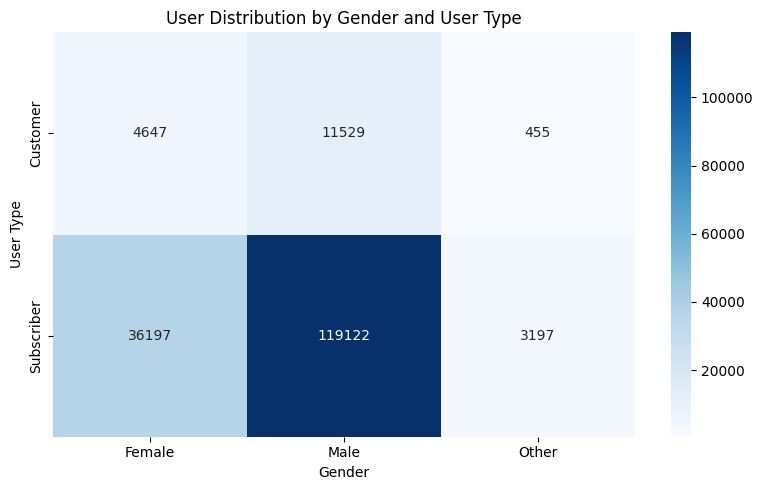

In [18]:
# Create a crosstab of user_type vs gender
ct = pd.crosstab(df['user_type'], df['member_gender'])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')

labels('User Distribution by Gender and User Type','Gender','User Type')
plt.tight_layout()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Trip duration, the main feature of interest, was investigated in relation to user type and age. A small negative pattern can be seen in the scatter plot of age vs. log-transformed trip duration: older users typically take shorter trips, while younger users typically take a bit more ones. Younger riders may be more active or use their bikes for curiosity, which may clarify this. The box plot can show that customers usually travel farther than subscribers. Customers have a higher median trip time and a more spread distribution, which suggests that there is greater variation in how long they ride. On the other hand, subscribers usually travel shorter and more reliably, perhaps as a result of regularly riding their bikes to work. Additionally, user type distribution varies significantly by gender: males are far more likely to be subscribers than females, while customers show a more balanced, yet still male-leaning distribution. The "Other" gender group, though small, also favors subscriptions, following the same trend.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>There was a slight negative correlation between age and log-transformed trip duration, indicating that younger riders especially those in their 20s and early 30s, tend to take longer and more varied trips than riders in their older years. When comparing trip durations by user type, Customers tend to take longer trips than Subscribers, which probably reflects different usage purposes. Customers may be more flexible travelers, such as tourists or casual users, while Subscribers may be workers with shorter, more frequent rides. Furthermore, subscribers are increasing across all age groups, particularly those between the ages of 26 and 35, suggesting that adult workers are the main subscription users, while customers are more evenly distributed across younger age groups, suggesting infrequent or less frequent use. Additionally, males show the highest subscriber-to-customer ratio, indicating stronger commitment, followed by "other" and females. The system is mainly used by subscribers, suggesting it caters more to regular commuters than casual users. These usage patterns help explain the differences in trip duration and timing seen earlier, reflecting varied behaviors between subscribers and customers

## Multivariate Exploration

In [19]:
df_scatter['age']=df_scatter['age'].astype(int)

/tmp/ipykernel_13/3812702184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scatter['age']=df_scatter['age'].astype(int)


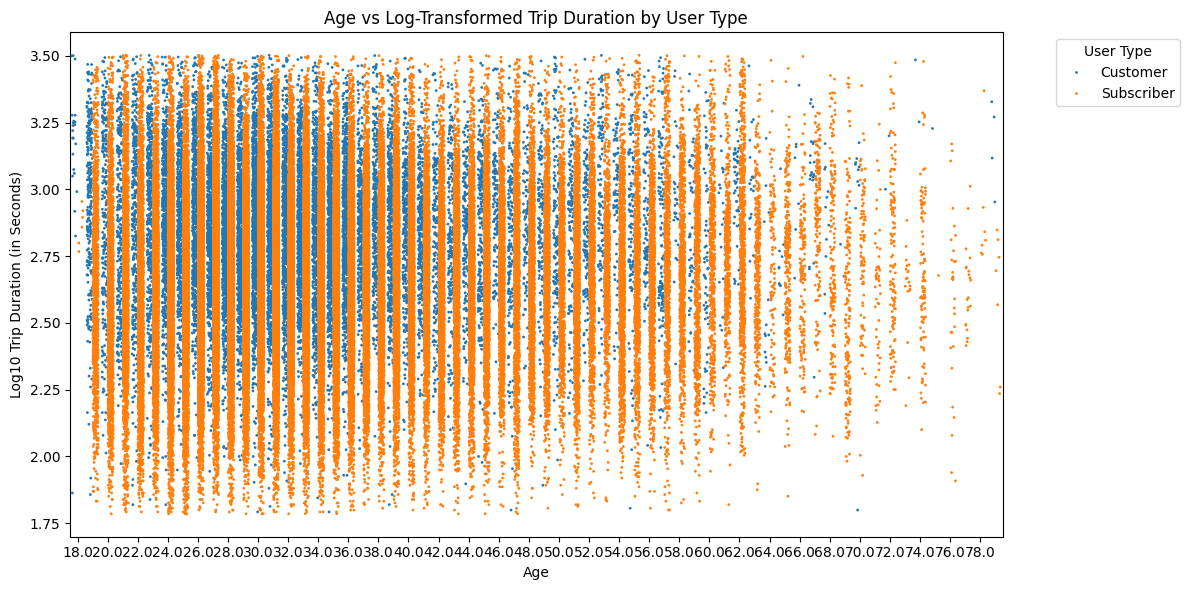

In [20]:
plt.figure(figsize=(12, 6))

scatter = sns.stripplot(
    data=df_scatter.query('duration_sec < duration_sec.quantile(0.99) and age <= 80'),
    x='age',
    y=np.log10(df_scatter['duration_sec']),
    hue='user_type',
    size=2,
    jitter=0.35,
    dodge=True
)


labels('Age vs Log-Transformed Trip Duration by User Type','Age','Log10 Trip Duration (in Seconds)')
plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')

pos, lab = plt.xticks()
plt.xticks(pos[::2], lab[::2])

plt.tight_layout()
plt.show()


In [21]:
#Re-convert start_time and start_date to datetime objects
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S.%f', errors='coerce')
df['start_date'] = pd.to_datetime(df['start_date'], format='%Y-%m-%d', errors='coerce')
df['start_hour'] = df['start_time'].dt.hour
df['start_month'] = df['start_date'].dt.month_name() 
df.head(5)

/tmp/ipykernel_13/2104786445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S.%f', errors='coerce')
/tmp/ipykernel_13/2104786445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(df['start_date'], format='%Y-%m-%d', errors='coerce')
/tmp/ipykernel_13/2104786445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,end_date,log_duration,start_hour,start_month
0,52185,1900-01-01 17:32:10.145,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,2019-02-28,2019-03-01,4.717546,17.0,February
2,61854,1900-01-01 12:13:13.218,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,2019-02-28,2019-03-01,4.791368,12.0,February
3,36490,1900-01-01 17:54:26.010,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,2019-02-28,2019-03-01,4.562174,17.0,February
4,1585,1900-01-01 23:54:18.549,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,2019-02-28,2019-03-01,3.200029,23.0,February
5,1793,1900-01-01 23:49:58.632,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,2019-02-28,2019-03-01,3.253580,23.0,February


/tmp/ipykernel_13/2291441537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 80],


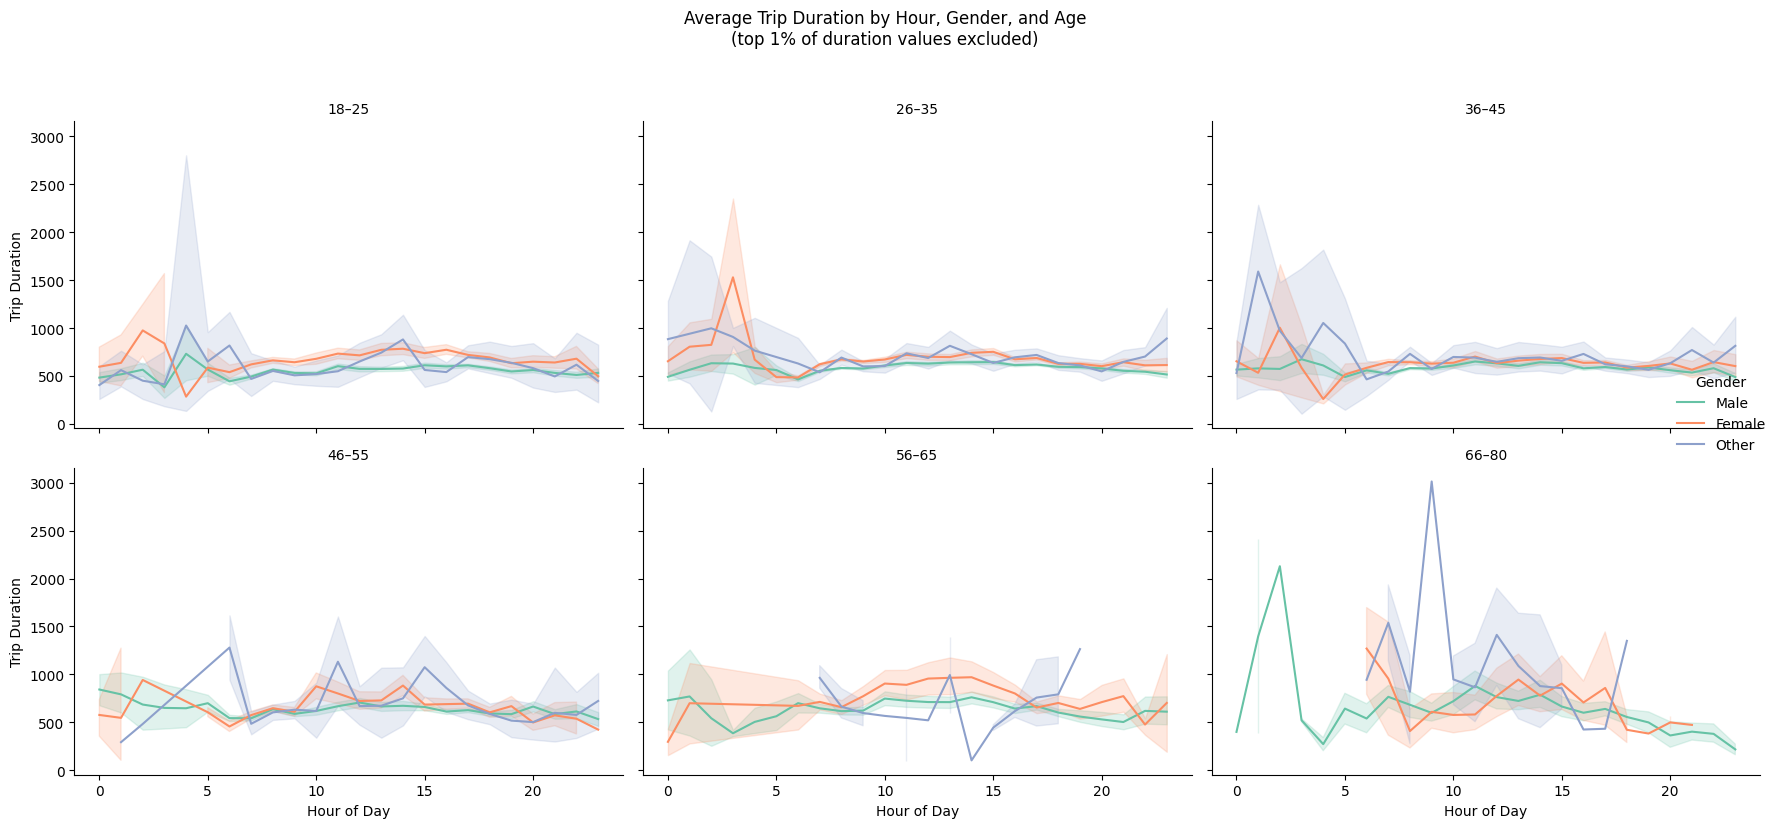

In [22]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 80],
                         labels=['18–25', '26–35', '36–45', '46–55', '56–65', '66–80'])

# Create the FacetGrid: facet by month, color by gender
g = sns.FacetGrid(
    df.query('duration_sec < duration_sec.quantile(0.99)'),
    col="age_group",
    hue="member_gender",
    col_wrap=3,  # 3 plots per row
    height=4,
    aspect=1.4,
    palette="Set2"
)

# Map lineplot: x = hour, y = log trip duration
g.map(
    sns.lineplot,
    "start_hour",
    "duration_sec",
    estimator='mean'
)

g.add_legend(title="Gender")
g.set_axis_labels("Hour of Day", "Trip Duration")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Average Trip Duration by Hour, Gender, and Age\n(top 1% of duration values excluded)", y=1.03)

plt.tight_layout()
plt.show()



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A small negative correlation is shown between age and log-transformed trip duration, with younger users—especially under 40—taking longer trips. Customers typically log longer trips than Subscribers, likely due to leisure use. Gender also plays a role, with minor differences across male, female, and "Other" categories. Time of day affects trip length, with early morning and late evening trips tending to be longer, especially for female riders. Facet plot insights reveal that the 18–25 age group shows the highest durations in early morning hours (2–4 AM), suggesting leisure travel. Middle-aged users show more stable patterns, while the 66–80 group peaks around 8–10 AM. The "Other" gender category has a unique peak at 8 AM in older age groups. Early mornings generally show longer trips, while daytime hours are more consistent.

### Were there any interesting or surprising interactions between features?

> The first scatter plot showed that younger Customers take significantly longer trips than Subscribers of the same age, with a wider range in durations, due to the interaction between age, user type, and gender. Unexpectedly, some users were aged over 90 or even 120, suggesting possible data entry errors. The combination of gender and user type introduced minor differences, especially among female and "Other" gender riders. The second plot added a time dimension by showing average trip duration by month, gender, and hour. While male riders maintained consistent durations throughout the day, female and "Other" gender riders took longer trips in the morning and evening, suggesting variations in usage context. Notably, the 18–25 group had the most extreme and variable trip durations, especially around 2–4 AM. Middle-aged riders (26–55) were the most stable, forming a U-shaped pattern in trip duration consistency. Gender effects became more pronounced with older age, particularly for the “Other” category in the 66–80 group. Early morning duration spikes (2–6 AM) varied by age, indicating age-specific rather than universal travel behavior. These interactions reflect complex, non-linear relationships between age, gender, and time-of-day.

## Conclusions

Data wrangling was crucial for formatting time data and extracting features like hour and month.
Log-transforming trip duration reduced skewness and improved plot readability.
Various plots (histograms, bar charts, scatter, box, facet) enabled multi-angle exploration.
The “Question–Visualization–Observation” approach guided the analysis and deepened insights.

- Distribution of Trip Durations The majority of trips lasted less than 30 minutes, indicating a highly right-skewed distribution of trip durations. To normalize the data and make comparisons and visualizations more insightful, log transformation was used.
 
 
- User-Type Behavior Customers make up the majority of bike users, but subscribers exceed them. Despite having a smaller share, customers typically travel farther than    subscribers, most likely because they use the service more frequently or for leisure. The fact that subscribers use the system the most suggests that regular commuters are its target audience rather than casual users.The highest subscriber-to-customer ratio, which indicates greater commitment, is seen among males, followed by "other" and females.


- Differences by Gender The dataset consists mainly of male users, with female users coming in second and only a small number labeled "Other". Over all hours of the day, females typically travel farther than males, particularly in the early morning and evening. While males maintained consistent durations throughout the day, females and "Other" gender riders showed longer trips during morning and evening hours, suggesting different usage contexts. The "Other" gender category also favors subscriptions despite being small, following the same trend.
 

- Age Trends Younger riders (especially those under 40) generally take longer trips than older users. A small negative correlation was observed between age and trip duration. Several outlier age values (e.g., users aged 90–120+) suggest potential data entry errors. The most extreme and unstable trip durations were observed in the 18–25 age group, particularly between 2-4 AM. The most consistent patterns were seen in riders between the ages of 26 and 55.


- Time-Related Trends The majority of rides take place during the day, with morning and late afternoon being the obvious peak times for commuting.The length of the trip tends to increase in the early morning and late evening, which may indicate slowly rides during off-peak hours.

 

- Complex Interaction Patterns
The combination of age, user type, and gender created interaction effects on trip duration, revealing non-linear and complex relationships rather than simple correlations.
Gender effects became more pronounced with older age, particularly for the "Other" category in the 66-80 group.
These interactions reflect complex, age-specific rather than universal travel behavior patterns.
 
